# Ensemble Learning
You should build a machine learning pipeline using an ensemble learning model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test an ensemble learning model, such as [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) or [gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [26]:
# importing libraries

import pandas as pd # used for csv
from sklearn.model_selection import train_test_split # used for spliting data into df_train and df_test
from sklearn.metrics import accuracy_score, confusion_matrix # used to get accuracy of the model, confusion matrix (just for fun)
import IPython.display # used for displaying the data
from sklearn.preprocessing import StandardScaler # adding this scaler for RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier # adding classifier i will use here
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting also
import shutil # for printing at center
import os # used for coloring text

In [2]:
os.system('color')

RED = '\033[31m'
GREEN = '\033[32m'
YELLOW = '\033[33m'
BLUE = '\033[34m'
MAGENTA = '\033[35m'
CYAN = '\033[36m'

RESET = '\033[0m'

In [3]:
# reading data(.csv) using pandas as pd and then exploring the data

df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")

columns = shutil.get_terminal_size().columns

print(RED + "df.head()".center(columns) + RESET)
display(df.head())

print(BLUE + "df.info()".center(columns) + RESET)
display(df.info())

print(GREEN + "df.describe()".center(columns) + RESET)
display(df.describe())

print(YELLOW + "df.isnull().sum()".center(columns) + RESET)
display(df.isnull().sum())

print(CYAN + 'df["class"].value_counts()'.center(columns) + RESET)
display(df["class"].value_counts())

print(MAGENTA + "df.corr()".center(columns) + RESET)
display(df.corr())

                                             df.head()                                              


,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


                                             df.info()                                              
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


None

                                           df.describe()                                            


,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
mean,34415.179250,4.439500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076750,0.015250,0.013000,0.001500,0.0,0.0,0.0,0.0,0.0,0.0
std,20508.890104,2.879655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.616022,0.964495,0.822192,0.094868,0.0,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,16575.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,34435.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,52111.500000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,69998.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.000000,61.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


                                         df.isnull().sum()                                          


,0
id,0
class,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


                                     df["class"].value_counts()                                     


,count
class,
1,486
7,426
3,417
8,416
6,391
2,390
0,376
4,369
9,366


                                             df.corr()                                              


,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,1.000000,0.001095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.007428,-0.022543,0.021988,0.021988,NaN,NaN,NaN,NaN,NaN,NaN
class,0.001095,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026093,0.014063,0.025047,0.025047,NaN,NaN,NaN,NaN,NaN,NaN
pixel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# spliting the data into train and test (75/25)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("Shape of original data:- ",df.shape)
print("Shape of train data:- ",df_train.shape)
print("Shape of test data:- ",df_test.shape)

Shape of original data:-  (4000, 786)
Shape of train data:-  (3200, 786)
Shape of test data:-  (800, 786)


In [5]:
"""
dropping id column
dropping class column from df_train and df_test to get x_train and x_test
adding class column from df to df_train and df_test
"""

x_train = df_train.drop(["class","id"], axis=1,)
y_train = df_train["class"]

x_test = df_test.drop(["class","id"], axis=1)
y_test = df_test["class"]

print("Shape of x_train:- ",x_train.shape)
print("Shape of x_test:- ",x_test.shape)
print("Shape of y_train:- ",y_train.shape)
print("Shape of y_test:- ",y_test.shape)

Shape of x_train:-  (3200, 784)
Shape of x_test:-  (800, 784)
Shape of y_train:-  (3200,)
Shape of y_test:-  (800,)


In [6]:
# Using Standard Scaler for scaling all the int64 data (accuracy doesnot change for GrandientBoost)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
# Using GradientBoostingClassifier at random_state = 42

gb_model =  GradientBoostingClassifier(random_state=42)
gb_model = gb_model.fit(x_train,y_train)

In [8]:
# predicting and getting the accuracy

y_pred = gb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100,"%")

91.0 %


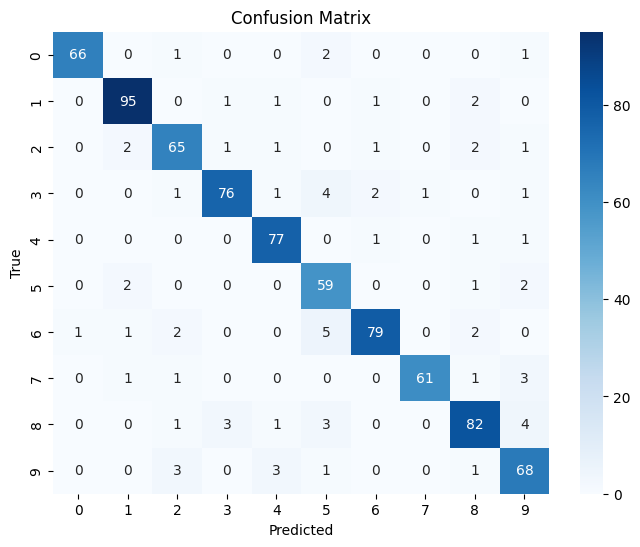

In [9]:
# Displaying data using Matplotlib und seaborn

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [10]:
rf_model = RandomForestClassifier(random_state=42,n_estimators=77, min_samples_split=2, min_samples_leaf=1, criterion='gini')
rf_model = rf_model.fit(x_train,y_train)

In [19]:
pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy:- {accuracy*100} %")

cm_2 = confusion_matrix(y_test, pred)
print(CYAN + str(cm) + RESET)

Accuracy:- 93.125 %
[[66  0  1  0  0  2  0  0  0  1]
 [ 0 95  0  1  1  0  1  0  2  0]
 [ 0  2 65  1  1  0  1  0  2  1]
 [ 0  0  1 76  1  4  2  1  0  1]
 [ 0  0  0  0 77  0  1  0  1  1]
 [ 0  2  0  0  0 59  0  0  1  2]
 [ 1  1  2  0  0  5 79  0  2  0]
 [ 0  1  1  0  0  0  0 61  1  3]
 [ 0  0  1  3  1  3  0  0 82  4]
 [ 0  0  3  0  3  1  0  0  1 68]]


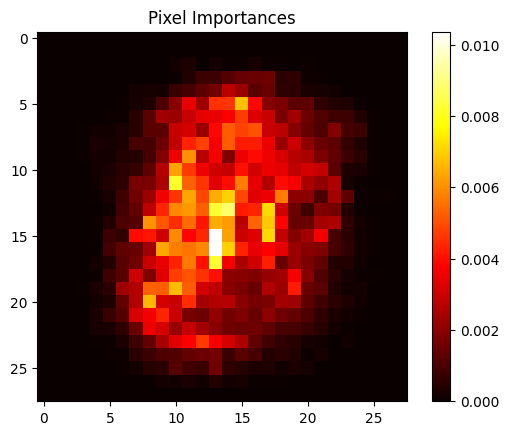

In [25]:
importances = rf_model.feature_importances_
importances = importances.reshape((28, 28))

plt.imshow(importances, cmap='hot')
plt.title('Pixel Importances')
plt.colorbar()
plt.show()